#                                   Face Recognition Using CNN
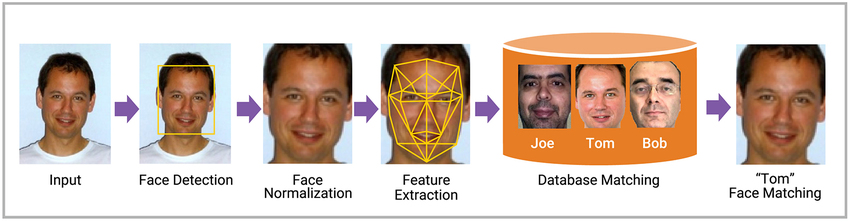

# Steps
### 1. Generate dataset
### 2.Train the dataset
### 3. Detect the face and named if it is already stored in our dataset

# Generating dataset

In [1]:
!pip install opencv-python


In [1]:
import cv2

In [2]:
def generating_dataset():
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def cropped_face(img):
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#changing image to gray scale 
        faces = face_cascade.detectMultiScale(gray, 1.4, 6)
            # scaling factor = 1.3 
            # minimum neighbor = 5
      
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_img = img[y:y+h,x:x+w]#to crop only the face
        return cropped_img
   
 #to open the camera
 # 0 for external camera and 1 for the internal camera
    cap = cv2.VideoCapture(0)
    id =1
    #id of first person
    img_id = 0
    
    while True:
        ret, frame = cap.read()
        if cropped_face(frame) is not None:
            img_id+=1
            face = cv2.resize(cropped_face(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            file_name_path = "data/user."+str(id)+"."+str(img_id)+".jpg"
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
            
            cv2.imshow("Cropped face", face)
            
        if cv2.waitKey(1)==13 or int(img_id)==200: #13 is the ASCII character of Enter
            break
            
    cap.release()
    cv2.destroyAllWindows()
    print("Samples collected successfully!!!!")
generating_dataset()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\skjha\AppData\Local\Temp\ipykernel_25232\239759053.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Samples collected successfully!!!!


#  Classifier and saving it


In [3]:
!pip install numpy

In [4]:
!pip install pillow

In [6]:
!pip install --user opencv-contrib-python

In [3]:
import numpy as np
from PIL import Image
import os

In [4]:
def training_classifier(data_dir):
    path = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]#joining image to data path
    #empty list faces and ids
    faces = []
    ids = []
    
    for image in path:
        img = Image.open(image).convert('L')#to covert into grayscale
        imageNp = np.array(img, 'uint8')
        id = int(os.path.split(image)[1].split(".")[1])
        
        faces.append(imageNp)
        ids.append(id)
        
    ids = np.array(ids)
    
    # Training and saving the classifier
    clf = cv2.face.LBPHFaceRecognizer_create()
    clf.train(faces,ids)
    clf.write("classifier.xml")
training_classifier("data")

# Detecting the image and  naming it, if it is available in our dataset 

In [5]:
import cv2
import numpy as np
from PIL import Image
import os


In [ ]:
def draw_boundary(img, classifier, scaleFactor, minNeighbors, color, text, clf):# to draw rectangle around the face
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features = classifier.detectMultiScale(gray_img, scaleFactor, minNeighbors)
    
    for (x,y,w,h) in features:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2 )
        
        id, pred = clf.predict(gray_img[y:y+h,x:x+w])
        confidence = int(100*(1-pred/300))#whether image is authorized or not
        
        if confidence>70:
            if id==1:
                cv2.putText(img, "SHUBHAM", (x,y-5), cv2.FONT_HERSHEY_COMPLEX, 0.8, color, 1, cv2.LINE_AA)
           
        else:
            cv2.putText(img, "UNKNOWN", (x,y-5), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)
    
    return img

# loading classifier
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

clf = cv2.face.LBPHFaceRecognizer_create()
clf.read("classifier.xml")

video_capture = cv2.VideoCapture(0)

while True:
    ret, img = video_capture.read()
    img = draw_boundary(img, faceCascade, 1.3, 6, (255,255,255), "Face", clf)
    cv2.imshow("face Detection", img)
    
    if cv2.waitKey(1)==13:
        break
video_capture.release()
cv2.destroyAllWindows()